# Plot Fit Error for QNM Frequencies

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import positive
import positive.physics as pp
from os.path import expanduser
import pickle
import numpy as np
from scipy.io import loadmat
from scipy.interpolate import InterpolatedUnivariateSpline as spline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from imp import load_source
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 
mpl.rcParams['xtick.major.pad'] = 6
mpl.rcParams['ytick.major.pad'] = mpl.rcParams['xtick.major.pad']

## Define functions

In [3]:
def kappa(j_f, l, m):
    beta = 1.0/(2.0 + l - np.abs(m) )
    return (np.log(2.0 - j_f)/np.log(3.0))**(beta)

## FIG. 1 (Top Left)

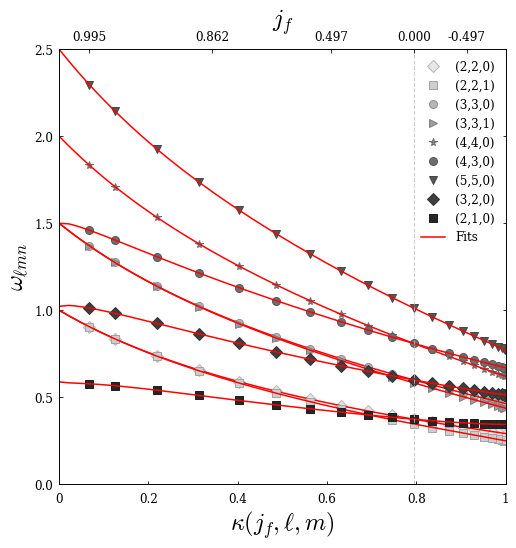

In [15]:
fig, ax = plt.subplots(figsize=2*plt.figaspect(1))
fig.subplots_adjust(hspace=.05)

zlist = [
    (2,2,0), (2,2,1),
    (3,3,0), (3,3,1), 
    (4,4,0), (4,3,0), 
    (5,5,0), (3,2,0),
    (2,1,0)]
mkrlist = 'Dso>*ovDs'
mkrclrs = reversed(0.15+0.75*positive.rgb(len(zlist), grayscale=True))

for z, mkr, color in zip(zlist, mkrlist, mkrclrs):
    # Plot markers
    j_f = 0.995*np.sin(np.linspace(-np.pi/2, np.pi/2, 21))
    w = np.array([pp.leaver(j, *z)[0] for j in j_f])
    ax.plot(
        kappa(j_f, 0.0, 0.0), np.real(w),
        ls='none', color=color,
        marker=mkr, ms=8.0, mec=0.8*color,
        label=str(z).replace(' ', ''))

    # Plot fit
    j_f = np.linspace(-1, 1, 4096)
    ax.plot(
        kappa(j_f, 0.0, 0.0), np.real(pp.cw181003550(j_f, *z)),
        lw=1.5, color=[1.0, 0.0, 0.0], label='Fits' if z==(2,1,0) else None)

# Plot j_f=0
ax.axvline(kappa(0.0, 0, 0), ls='--', color=[0.75, 0.75, 0.75])
    
# Format main axes
ax.set_xlabel('$\kappa(j_f, \ell, m)$', fontsize=24)
ax.set_ylabel(r'$\omega_{ \ell m n}$', fontsize=24)
ax.set_xlim([0,1])
ax.set_ylim([0, 2.5])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.tick_params(axis='x', which='major', pad=8)
ax.set_xticks(np.linspace(0, 1, 6))
ax.tick_params(direction='in')
ax.legend(ncol=1, fontsize=12, frameon=False, loc=1)
ax.tick_params(left=True, bottom=True, right=True, top=False)

# Format twined axes
ax2 = ax.twiny()
ax2.set_xlabel('$j_f$', fontsize=24)
j_f_ticks = 0.995*np.sin(np.linspace(np.pi/2, -np.pi/2, 7))[:5]
kappa_ticks = kappa(j_f_ticks, 2, 2)
ax2.set_xticks(kappa_ticks)
ax2.set_xticklabels(['{0:.3f}'.format(tick) for tick in j_f_ticks])
ax2.tick_params(direction='in')

# Save figure
plt.show()
plt.close(fig)
# fig.savefig('./fig1-top-left.pdf', pad_inches=0, bbox_inches='tight')
fig.savefig('../fits_w.pdf')

## FIG. 1 (Top Right)

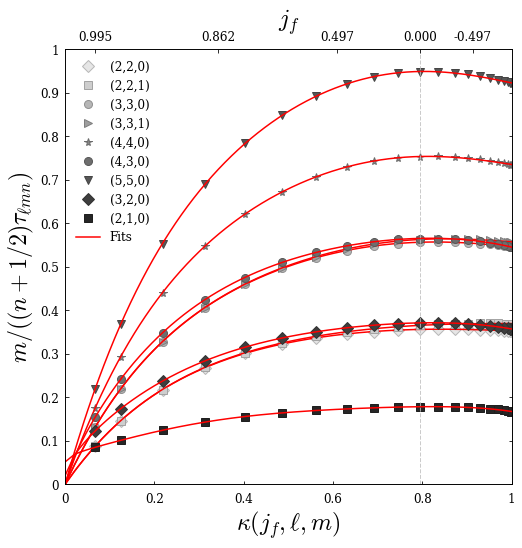

In [16]:
fig, ax = plt.subplots(figsize=2*plt.figaspect(1))
fig.subplots_adjust(hspace=.05)

zlist = [
    (2,2,0), (2,2,1),
    (3,3,0), (3,3,1), 
    (4,4,0), (4,3,0), 
    (5,5,0), (3,2,0),
    (2,1,0)]
mkrlist = 'Dso>*ovDs'
mkrclrs = reversed(0.15+0.75*positive.rgb(len(zlist), grayscale=True))

for z, mkr, color in zip(zlist, mkrlist, mkrclrs):
    # Plot markers
    j_f = 0.995*np.sin(np.linspace(-np.pi/2, np.pi/2, 21))
    w = np.array([pp.leaver(j, *z)[0] for j in j_f])
    ax.plot(
        kappa(j_f, 0.0, 0.0), z[1]/(z[2]+0.5)*np.imag(w.conj()),
        ls='none', color=color,
        marker=mkr, ms=8.0, mec=0.8*color,
        label=str(z).replace(' ', ''))

    # Plot fit
    j_f = np.linspace(-1, 1, 4096)
    ax.plot(
        kappa(j_f, 0.0, 0.0), z[1]/(z[2]+0.5)*np.imag(pp.cw181003550(j_f, *z)),
        lw=1.5, color=[1.0, 0.0, 0.0], label='Fits' if z==(2,1,0) else None)

# Plot j_f=0
ax.axvline(kappa(0.0, 0, 0), ls='--', color=[0.75, 0.75, 0.75])

# Format main axes
ax.set_xlabel('$\kappa(j_f, \ell, m)$', fontsize=24)
ax.set_ylabel(r'$m / ((n+1/2)\tau_{ \ell m n})$', fontsize=24)
ax.set_xlim([0,1])
ax.set_ylim([0, 1])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.tick_params(axis='x', which='major', pad=8)
ax.set_xticks(np.linspace(0, 1, 6))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks(np.linspace(0, 1, 11))
ax.tick_params(direction='in')
ax.legend(ncol=1, fontsize=12, frameon=False, loc=2)
ax.tick_params(left=True, bottom=True, right=True, top=False)

# Format twined axes
ax2 = ax.twiny()
ax2.set_xlabel('$j_f$', fontsize=24)
j_f_ticks = 0.995*np.sin(np.linspace(np.pi/2, -np.pi/2, 7))[:5]
kappa_ticks = kappa(j_f_ticks, 2, 2)
ax2.set_xticks(kappa_ticks)
ax2.set_xticklabels(['{0:.3f}'.format(tick) for tick in j_f_ticks])
ax2.tick_params(direction='in')

plt.show()
plt.close(fig)
# fig.savefig('./fig1-top-right.pdf', pad_inches=0, bbox_inches='tight')
fig.savefig('../fits_tau.pdf')